Importing python libraries
......
 
 
logging in...
...
...
...
 
Text Analysis Visualization below...
...
 


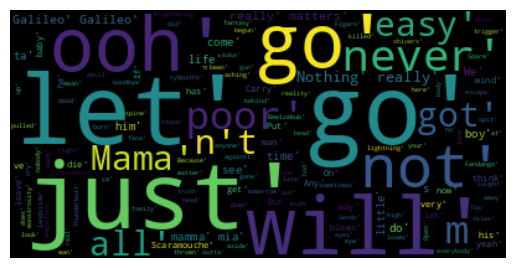

In [1]:
# Import List
print("Importing python libraries")
print("......")
print(" ")
import imaplib
import getpass
import email
import pandas as pd
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist


# Log into Gmail via API
M = imaplib.IMAP4_SSL('imap.gmail.com')
user = getpass.getpass("Email: ")
password = getpass.getpass("Password: ")
M.login(user, password)
print(" ")
print("logging in...")
print("...")
print("...")
print("...")


# Select folder (all in the case), search all for the required data
M.select()
typ, data = M.search(None, '(FROM "<INPUT EMAIL HERE")') # Change search query here


# Variables for For Loop
result = data[0]
foo = []
bar = []
foobar = ""
mostCommon = []
toDrop = [':', 'https', 'as', 'Regards', 'Stefano', 'Sena', 'Procurement', '&', 'Warehouse', 'Operations', '[', 'image', 'Global', ']', 'Global', '177A', 'Snidercroft', 'Road',
          'Concord', ',', 'Ontario', 'Canada', 'L4K', '2J8', 'T', '905.660.5101', 'ext', '261', 'www.globalfurnituregroup.com', 'Follow', 'us', 'on', 'Facebook', '<',
          '//www.facebook.com/globalfurnituregroup/', '>', 'Linkedin', '//www.linkedin.com/company/global-furniture-group-usa', 'Pinterest', '//www.pinterest.com/globalfurngroup/',
          'Instagram', '//www.instagram.com/globalfurnituregroup/', 'Disclaimer', '//signature.globalfurnituregroup.com/disclaimer.html', 'to', '.', 'be', 'the', 'of', 'the', 'and', '.',
          'You', 'a', 'in', 'with', 'is', 'This', 'what', 'can', 'an', 'when', 'it', 'so', 'for', 'at,' '?', '!', 'from', '--', 'image.png', '-', '$', '@', 'globalfurnituregroup.com',
           '%', '=', '?', '*', ';', 'I', 'no', '(', ')', 'me', 'my', 'ٱللَّٰهِ', 'بِسْمِ', "per", "-", " - ", "_", " _ " ]
toDropAll = [x.lower() for x in toDrop] + [x.upper() for x in toDrop] + [x.capitalize() for x in toDrop]


#=================================================================================================================================================
#|                                                                                                                                               |
#|                               LOOP TO SEE TOKENIZED WORDCOUNT IF WANTED                                                                       |
#|                                                                                                                                               |
#=================================================================================================================================================
# # Iteration and storage into mostCommon var for tuple extraction
# for num in result.split():
#     typ, email_data = M.fetch(num, '(RFC822)')
#     raw_email = email_data[0][1]
#     raw_email_string = raw_email.decode('utf-8')
#     email_message = email.message_from_string(raw_email_string)
#     # begin tokenization and frequenxy distribution
#     for part in email_message.walk():
#         if part.get_content_type() == "text/plain":
#             body = part.get_payload(decode=True)
#             body = body.decode("utf-8")
#             token = word_tokenize(body)
#             # Remove common repeated items
#             for x in toDropAll:
#                 try:
#                     while x in toDropAll:
#                         if x in toDropAll:
#                             token.remove(x)
#                         else:
#                             pass
#                 except:
#                     pass
#             # Freq dist
#             fdist = FreqDist(token)
#             fdist1 = fdist.most_common(10)
#             foo.append(fdist1)
#             mostCommon = [x for y in foo for x in y]


# # Sort list of tuples and print the most common 10
# print(" ")
# print("Top 10 most common words...")
# print("...")
# print(" ")
# sorted_mostCommon = sorted(mostCommon, key=lambda tup: tup[1], reverse=True)
# # Indexing will need to be adjusted if there are more than one word said multiple times over many emails; depending on the need
# print(sorted_mostCommon[0:10])
#=================================================================================================================================================
#|                                                                                                                                               |
#=================================================================================================================================================


print(" ")
print("Text Analysis Visualization below...")
print("...")
print(" ")

# Iteration and extraction for CSV and wordanalysis vis
for num in result.split():
    typ, email_data = M.fetch(num, '(RFC822)')
    raw_email = email_data[0][1]
    raw_email_string = raw_email.decode('utf-8')
    email_message = email.message_from_string(raw_email_string)
    for part in email_message.walk():
        if part.get_content_type() == "text/plain":
            body = part.get_payload(decode=True)
            body = body.decode("utf-8")
            token = word_tokenize(body)
            for x in toDropAll:
                try:
                    while x in toDropAll:
                        if x in toDropAll:
                            token.remove(x)
                        else:
                            pass
                except:
                    pass
            bar.append(token)
            bar = [' '.join(map(str,bar))]


# Convert variable into simple csv for table view
toCSV = pd.DataFrame(bar)
toCSV.to_csv('bar.csv', index=False)



# Open CSV using pandas
df = pd.read_csv("bar.csv")
df.head()

# Convert dataframe to string
textiter = pd.DataFrame(df)
textiter1 = textiter.to_string()

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textiter1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()